## Task 3 with SVM and NN

### Import

In [13]:
# Import libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt 
import seaborn as sns

### Load the data

In [1]:
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


In [2]:
len(train.data),len(test.data)

(11314, 7532)

### Preprocess of the text

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

ps = PorterStemmer()
#ps.stem(word='I was going to the store')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    #tokens = [ps.stem(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)


In [4]:
X_train_clean = [preprocess(doc) for doc in train.data]
X_test_clean = [preprocess(doc) for doc in test.data]


### Convert Text to Numbers (TF-IDF) (Tekenization)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_clean)
X_test_tfidf = vectorizer.transform(X_test_clean)


### Vectorize with BERT

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

model_bert = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
embeddings_train = model_bert.encode(X_train_clean)
embeddings_test = model_bert.encode(X_test_clean)
embeddings_train.shape,embeddings_test.shape

### Combining Embeddings with TF-IDF 

In [ ]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, embeddings_train])
X_test_combined = hstack([X_test_tfidf, embeddings_test])

### Train the SVM

In [155]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tfidf, train.target)


c:\Users\ahmet\anaconda3\envs\ultra\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

### Train LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, train.target)

LogisticRegression(max_iter=1000)

### Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(test.target, predictions))
print(classification_report(test.target, predictions, target_names=test.target_names))


Accuracy: 0.6310408921933085
                          precision    recall  f1-score   support

             alt.atheism       0.49      0.46      0.47       319
           comp.graphics       0.59      0.61      0.60       389
 comp.os.ms-windows.misc       0.57      0.56      0.56       394
comp.sys.ibm.pc.hardware       0.59      0.58      0.58       392
   comp.sys.mac.hardware       0.65      0.65      0.65       385
          comp.windows.x       0.70      0.65      0.67       395
            misc.forsale       0.72      0.76      0.74       390
               rec.autos       0.65      0.60      0.62       396
         rec.motorcycles       0.69      0.66      0.67       398
      rec.sport.baseball       0.52      0.80      0.63       397
        rec.sport.hockey       0.83      0.83      0.83       399
               sci.crypt       0.76      0.65      0.70       396
         sci.electronics       0.53      0.51      0.52       393
                 sci.med       0.71      0.71 

In [157]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(test.target, predictions))
print(classification_report(test.target, predictions, target_names=test.target_names))


Accuracy: 0.6433882103027084
                          precision    recall  f1-score   support

             alt.atheism       0.49      0.45      0.47       319
           comp.graphics       0.61      0.63      0.62       389
 comp.os.ms-windows.misc       0.60      0.59      0.59       394
comp.sys.ibm.pc.hardware       0.58      0.61      0.60       392
   comp.sys.mac.hardware       0.66      0.66      0.66       385
          comp.windows.x       0.73      0.64      0.68       395
            misc.forsale       0.72      0.76      0.74       390
               rec.autos       0.68      0.61      0.64       396
         rec.motorcycles       0.73      0.70      0.71       398
      rec.sport.baseball       0.53      0.81      0.64       397
        rec.sport.hockey       0.86      0.86      0.86       399
               sci.crypt       0.76      0.70      0.73       396
         sci.electronics       0.54      0.50      0.52       393
                 sci.med       0.74      0.72 

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(f'Accuracy: {accuracy_score(test.target, y_pred)}')
print(classification_report(test.target, y_pred, target_names=train.target_names))

Accuracy: 0.6532129580456718
                          precision    recall  f1-score   support

             alt.atheism       0.46      0.46      0.46       319
           comp.graphics       0.59      0.65      0.62       389
 comp.os.ms-windows.misc       0.63      0.56      0.59       394
comp.sys.ibm.pc.hardware       0.64      0.60      0.62       392
   comp.sys.mac.hardware       0.68      0.66      0.67       385
          comp.windows.x       0.74      0.66      0.70       395
            misc.forsale       0.74      0.77      0.75       390
               rec.autos       0.69      0.65      0.67       396
         rec.motorcycles       0.47      0.77      0.58       398
      rec.sport.baseball       0.81      0.79      0.80       397
        rec.sport.hockey       0.88      0.86      0.87       399
               sci.crypt       0.84      0.64      0.73       396
         sci.electronics       0.54      0.56      0.55       393
                 sci.med       0.73      0.76 

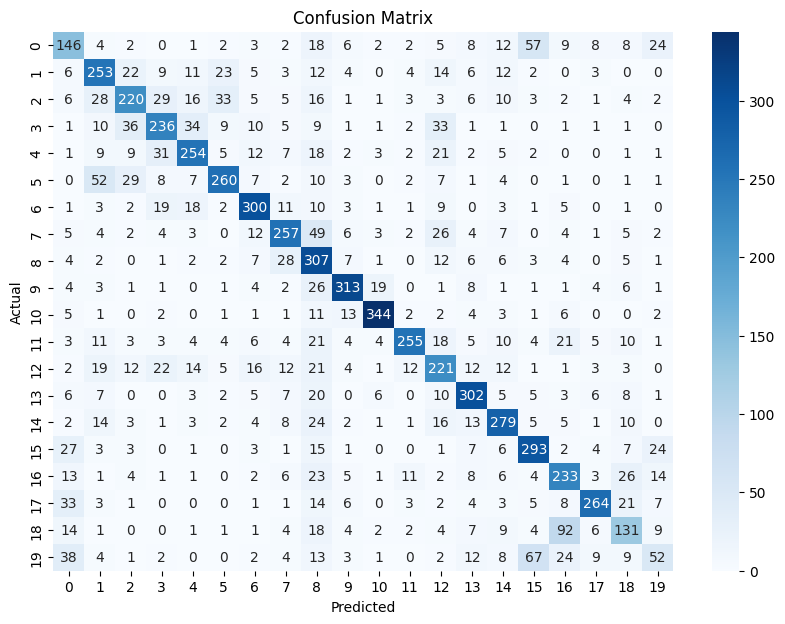

In [15]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(test.target, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Testing with new documents

In [158]:
new_docs = ["Neural networks are revolutionizing AI.", "The Yankees won last night's game."]
new_clean = [preprocess(doc) for doc in new_docs]
new_tfidf = vectorizer.transform(new_clean)
new_preds = model.predict(new_tfidf)

for doc, pred in zip(new_docs, new_preds):
    print(f"'{doc}' → {train.target_names[pred]}")


'Neural networks are revolutionizing AI.' → misc.forsale
'The Yankees won last night's game.' → rec.sport.baseball


In [162]:
new_docs = ["I like playing baseball and hockey "]
new_clean = [preprocess(doc) for doc in new_docs]
new_tfidf = vectorizer.transform(new_clean)
new_preds = model.predict(new_tfidf)

for doc, pred in zip(new_docs, new_preds):
    print(f"'{doc}' → {train.target_names[pred]}")


'I like playing baseball and hockey ' → rec.sport.hockey


### Train simple NN

In [175]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical


X_train_tfidf = vectorizer.fit_transform(X_train_clean).toarray()
X_test_tfidf = vectorizer.transform(X_test_clean).toarray()

# 4. Encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(train.target)
y_test_enc = encoder.transform(test.target)
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

In [168]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [176]:


# 5. Build the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train.target_names), activation='softmax'))

# 6. Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_tfidf, y_train_cat, epochs=15, batch_size=128, validation_split=0.1)

# 7. Evaluate
loss, accuracy = model.evaluate(X_test_tfidf, y_test_cat)
print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 1/15
80/80 [==============================] - 3s 22ms/step - loss: 2.6815 - accuracy: 0.3093 - val_loss: 1.9092 - val_accuracy: 0.5804
Epoch 2/15
80/80 [==============================] - 1s 19ms/step - loss: 1.3436 - accuracy: 0.6652 - val_loss: 1.1735 - val_accuracy: 0.6599
Epoch 3/15
80/80 [==============================] - 2s 19ms/step - loss: 0.8307 - accuracy: 0.7725 - val_loss: 1.0363 - val_accuracy: 0.6882
Epoch 4/15
80/80 [==============================] - 1s 18ms/step - loss: 0.6004 - accuracy: 0.8366 - val_loss: 0.9944 - val_accuracy: 0.6970
Epoch 5/15
80/80 [==============================] - 2s 19ms/step - loss: 0.4523 - accuracy: 0.8796 - val_loss: 1.0059 - val_accuracy: 0.6926
Epoch 6/15
80/80 [==============================] - 1s 19ms/step - loss: 0.3580 - accuracy: 0.9127 - val_loss: 1.0219 - val_accuracy: 0.6882
Epoch 7/15
80/80 [==============================] - 1s 18ms/step - loss: 0.2834 - accuracy: 0.9288 - val_loss: 1.0620 - val_accuracy: 0.6988
Epoch 8/15
80

In [177]:
# Example new documents
new_docs = [
    "The new graphics card from NVIDIA has amazing performance.",
    "The political debate in the senate was intense yesterday.",
    "I love studying the theories of quantum physics."
]

# 1. Preprocess the documents
new_docs_clean = [preprocess(doc) for doc in new_docs]

# 2. Vectorize using the same TF-IDF vectorizer
new_docs_tfidf = vectorizer.transform(new_docs_clean).toarray()

# 3. Predict
pred_probs = model.predict(new_docs_tfidf)
pred_labels = encoder.inverse_transform(pred_probs.argmax(axis=1))

# 4. Print results
for doc, label in zip(new_docs, pred_labels):
    print(f"\n📄 Text: {doc}\n➡️  Predicted Topic: {label}\n {train.target_names[label]}")


1/1 [==============================] - 0s 104ms/step

📄 Text: The new graphics card from NVIDIA has amazing performance.
➡️  Predicted Topic: 1
 comp.graphics

📄 Text: The political debate in the senate was intense yesterday.
➡️  Predicted Topic: 16
 talk.politics.guns

📄 Text: I love studying the theories of quantum physics.
➡️  Predicted Topic: 0
 alt.atheism
